In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
df = pd.read_csv('dataset_Facebook.csv',sep=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4.0,3,0.0,2752.0,5091.0,178.0,109.0,159.0,3078.0,1640.0,119.0,4.0,79.0,17.0,100
1,139441,Status,2,12,3.0,10,0.0,10460.0,19057.0,1457.0,1361.0,1674.0,11710.0,6112.0,1108.0,5.0,130.0,29.0,164
2,139441,Photo,3,12,3.0,3,0.0,2413.0,4373.0,177.0,113.0,154.0,2812.0,1503.0,132.0,0.0,66.0,14.0,80
3,139441,Photo,2,12,2.0,10,1.0,50128.0,87991.0,2211.0,790.0,1119.0,61027.0,32048.0,1386.0,58.0,1572.0,147.0,1777
4,139441,Photo,2,12,2.0,3,0.0,7244.0,13594.0,671.0,410.0,580.0,6228.0,3200.0,396.0,19.0,325.0,49.0,393


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 496 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         496 non-null    float64
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 497 non-null    float64
 7   Lifetime

In [4]:
df = pd.get_dummies(df, columns=['Type'])
df = df.dropna()

In [5]:
y = df['Paid']
X = df.drop('Paid',axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=2000)
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('precision', metrics.precision_score(y_test, predict))
print('recall', metrics.recall_score(y_test, predict))
print('accuracy', metrics.accuracy_score(y_test, predict))
print('f1', metrics.f1_score(y_test, predict))

precision 0.5833333333333334
recall 0.19444444444444445
accuracy 0.7443609022556391
f1 0.2916666666666667


(-0.01, 1.01)

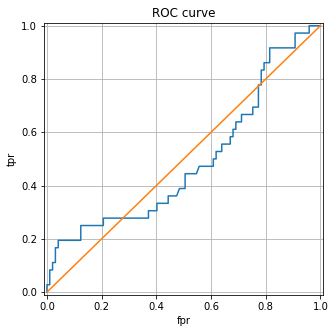

In [13]:
predict_proba = model.predict_proba(X_test)
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [14]:
df = pd.read_csv('dataset_Facebook.csv',sep=';')
df = pd.get_dummies(df, columns=['Type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Category                                                             500 non-null    int64  
 2   Post Month                                                           500 non-null    int64  
 3   Post Weekday                                                         496 non-null    float64
 4   Post Hour                                                            500 non-null    int64  
 5   Paid                                                                 497 non-null    float64
 6   Lifetime Post Total Reach                                            496 non-null    float64
 7   Lifetime

In [15]:
for i in df.columns:
    df.loc[df[i].isnull(), i] = df[i].median()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Category                                                             500 non-null    int64  
 2   Post Month                                                           500 non-null    int64  
 3   Post Weekday                                                         500 non-null    float64
 4   Post Hour                                                            500 non-null    int64  
 5   Paid                                                                 500 non-null    float64
 6   Lifetime Post Total Reach                                            500 non-null    float64
 7   Lifetime

In [52]:
y = df['Paid']
X = df.drop('Paid',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
   'max_depth': 3,
   'eta': 0.3, 
   'objective': 'multi:softprob',
   'num_class': 3}
num_round = 15

In [65]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

In [66]:
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])
metrics.precision_score(y_test, best_preds, average='macro')

0.6111111111111112